# Wine Case Analysis: *Wine Spectator*'s Top 100 Wines, 1988-2020
List available online on *Wine Spectator*'s [Top 100 Lists web site](https://top100.winespectator.com/lists/).

## File Setup

In [61]:
# import and initialize main python libraries
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import bar_chart_race as bcr
import seaborn as sns

# import libraries for file navigation
import os
import shutil
import glob
from pandas_ods_reader import read_ods

# import other packages
from scipy import stats
from sklearn import linear_model

# import geo packages
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

# import Geopy packages
import geopy
from geopy.geocoders import Nominatim

In [62]:
# initialize vizualization set
sns.set(style="whitegrid", palette="colorblind", color_codes=True)
sns.mpl.rc("figure", figsize=(10, 6))

# Jupyter Notebook
%matplotlib inline

## Dataframe Exploration

In [63]:
# Note: save CSV files in UTF-8 format to preserve special characters.
df_Wine_00 = pd.read_csv('./Wine_Hier00.csv')
df_Wine_01 = pd.read_csv('./Wine_Hier01.csv')
df_GeoCache = pd.read_csv('./GeoCache.csv')
df_Flag = pd.read_csv('./emoji_list.csv')

In [64]:
df_Wine_00.shape

(3304, 25)

In [65]:
df_Wine_00 = df_Wine_00.rename(columns={'lat': 'Latitude', 'long': 'Longitude'})
df_Wine_00.dtypes

Review_Year           float64
Rank                   object
Vintage                object
Score                 float64
Price                  object
Winemaker              object
Wine                   object
Wine_Style             object
Grape_Blend            object
Blend_List             object
Geography              object
Cases_Made            float64
Cases_Imported        float64
Reviewer               object
Drink_now             float64
Best_Drink_from       float64
Best_Drink_Through    float64
Review                 object
Hierarchy              object
Address                object
loc                    object
point                  object
Latitude              float64
Longitude             float64
altitude              float64
dtype: object

In [66]:
df_Wine_01 = df_Wine_01.rename(columns={'lat': 'Latitude', 'long': 'Longitude'})
df_Wine_01.dtypes

Review_Year           float64
Rank                   object
Vintage                object
Score                 float64
Price                  object
Winemaker              object
Wine                   object
Wine_Style             object
Grape_Blend            object
Blend_List             object
Geography              object
Cases_Made            float64
Cases_Imported        float64
Reviewer               object
Drink_now             float64
Best_Drink_from       float64
Best_Drink_Through    float64
Review                 object
Hierarchy              object
Address                object
loc                    object
point                  object
Latitude              float64
Longitude             float64
altitude              float64
dtype: object

In [67]:
df_Wine_01.shape

(3304, 25)

In [68]:
df_Wine_01.shape

(3304, 25)

In [69]:
# CSV of wines is retaining a blank row at the end of the dataset. Remove the last row to prevent data type errors.

# number of rows to drop
n = 1

df_Wine_00.drop(df_Wine_00.tail(n).index, inplace = True)
df_Wine_01.drop(df_Wine_01.tail(n).index, inplace = True)

In [70]:
# Review_Year
# Convert Review_Year from float to int
df_Wine_00['Review_Year'] = df_Wine_00['Review_Year'].astype(int)
df_Wine_01['Review_Year'] = df_Wine_01['Review_Year'].astype(int)

In [71]:
df_GeoCache.shape

(1228, 8)

In [72]:
df_Flag.shape

(19, 3)

In [73]:
df_Wine_00.sample(10)

,Review_Year,Rank,Vintage,Score,Price,Winemaker,Wine,Wine_Style,Grape_Blend,Blend_List,...,Best_Drink_from,Best_Drink_Through,Review,Hierarchy,Address,loc,point,Latitude,Longitude,altitude
790,2013,89,2009,95.0,100,Raymond,Cabernet Sauvignon Napa Valley Generations,Red,Cabernet Sauvignon,NaN,...,2013.0,2023.0,"Shows striking intensity, density, focus and l...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
782,2013,81,2010,93.0,47,Quinta do Crasto,Douro Reserva Old Vines,Red,Blend,Portuguese Red Blend,...,2013.0,2020.0,"This red is luscious, refined and muscular, sh...",Hierarchy_00,Portugal,Portugal,"(40.0332629, -7.8896263, 0.0)",40.033263,-7.889626,0.0
2225,1998,8,1996,95.0,52,Argiano,Toscana Solengo,Red,Blend,"Sangiovese, Cabernet Sauvignon, Merlot and Syrah",...,2000.0,NaN,Wild thing. This Italian red is even better th...,Hierarchy_00,Italy,Italia,"(42.6384261, 12.674297, 0.0)",42.638426,12.674297,0.0
0,2020,1,2010,96.0,139,Bodegas Marqués de Murrieta,Rioja Castillo Ygay Gran Reserva Especial,Red,Blend,Tempranillo and Mazuelo.,...,2020.0,2030.0,"Maturing well, this round red is a lovely exam...",Hierarchy_00,Spain,España,"(39.3262345, -4.8380649, 0.0)",39.326234,-4.838065,0.0
1600,2005,99,2002,91.0,20,Cortes de Címa,Touriga Nacional Alentejo,Red,Touriga Nacional,NaN,...,2005.0,NaN,"Decadent and powerful, with a meaty, gamy arom...",Hierarchy_00,Portugal,Portugal,"(40.0332629, -7.8896263, 0.0)",40.033263,-7.889626,0.0
2848,1992,46,1988,92.0,17,Fattoria di Felsina,Chianti Classico Berardenga Riserva,Red,Chianti,NaN,...,1992.0,NaN,Another winner from this estate. Made in a New...,Hierarchy_00,Italy,Italia,"(42.6384261, 12.674297, 0.0)",42.638426,12.674297,0.0
2212,1998,4,1995,95.0,60,Quinta do Vesuvio,Vintage Port,Dessert & Fortified,Blend,Port Blend Red,...,2008.0,NaN,A ripe and rich '95 boasting a remarkable esse...,Hierarchy_00,Portugal,Portugal,"(40.0332629, -7.8896263, 0.0)",40.033263,-7.889626,0.0
84,2020,85,2017,90.0,24,Koehler-Ruprecht,Pinot Noir Kabinett Trocken Pfalz,Red,Pinot Noir,NaN,...,2020.0,2027.0,"Quite juicy, with wild cherry, hibiscus and bl...",Hierarchy_00,Germany,Deutschland,"(51.0834196, 10.4234469, 0.0)",51.083420,10.423447,0.0
369,2017,69,2016,90.0,21,Gini,Soave Classico,White,Garganega,NaN,...,2017.0,2020.0,"A lithe, light-bodied white, with racy acidity...",Hierarchy_00,Italy,Italia,"(42.6384261, 12.674297, 0.0)",42.638426,12.674297,0.0
2892,1992,90,NV,91.0,38,Louis Roederer,Brut Champagne Brut Premier,Sparkling,Champagne,NaN,...,NaN,NaN,"Creamy, elegant and stylish, offering complex ...",Hierarchy_00,France,France,"(46.603354, 1.8883335, 0.0)",46.603354,1.888333,0.0


## Pivot on Address

### Hierarchy 00

In [74]:
# Count by Wine Style by Address - All Years
df_Count_WS_All_00 = pd.DataFrame({'Count' : df_Wine_00.groupby(['Wine_Style', 'Address','Latitude','Longitude'])['Score'].count()}).reset_index()
df_Count_WS_All_00.sample(10)

,Wine_Style,Address,Latitude,Longitude,Count
29,Sparkling,USA,39.783730,-100.445882,31
20,Red,South Africa,-28.816624,24.991639,22
41,White,South Africa,-28.816624,24.991639,22
43,White,USA,39.783730,-100.445882,347
35,White,Germany,51.083420,10.423447,60
39,White,New Zealand,-41.500083,172.834408,54
9,Red,Australia,-24.776109,134.755000,148
26,Sparkling,France,46.603354,1.888333,52
34,White,France,46.603354,1.888333,186
24,Rosé | Rosado,France,46.603354,1.888333,7


In [75]:
# Count by Wine Style - By Review Year
df_Count_WS_ByYear_00 = pd.DataFrame({'Count' : df_Wine_00.groupby(['Review_Year', 'Wine_Style', 'Address','Latitude','Longitude'])['Score'].count()}).reset_index()
df_Count_WS_ByYear_00.sample(10)

,Review_Year,Wine_Style,Address,Latitude,Longitude,Count
259,2005,Red,Spain,39.326234,-4.838065,5
487,2015,White,France,46.603354,1.888333,3
494,2015,White,USA,39.783730,-100.445882,6
40,1991,Red,Italy,42.638426,12.674297,13
563,2018,Sparkling,USA,39.783730,-100.445882,1
128,1997,White,France,46.603354,1.888333,11
497,2016,Dessert & Fortified,Spain,39.326234,-4.838065,1
32,1990,White,Australia,-24.776109,134.755000,1
190,2001,White,Austria,47.200034,13.199959,1
327,2008,White,Austria,47.200034,13.199959,3


### Hierarchy 01

In [76]:
# Count by Wine Style - All Years
df_Count_All_01 = pd.DataFrame({'Count' : df_Wine_01.groupby(['Wine_Style', 'Address','Latitude','Longitude'])['Score'].count()}).reset_index()
df_Count_All_01.sample(10)

,Wine_Style,Address,Latitude,Longitude,Count
73,Red,"Sicily, Italy",37.587794,14.155048,6
0,Dessert & Fortified,"Andalucia, Spain",37.339996,-4.581161,6
110,White,"California, USA",36.701463,-118.755997,283
36,Red,"Corsica, France",42.188090,9.068414,1
51,Red,"Malpica de Tajo, Spain",39.894620,-4.548450,3
70,Red,"San Antonio Valley, Chile",-33.580861,-71.613238,1
142,White,"Rheinhessen, Germany",49.904518,8.271108,4
128,White,"Macedonia, Greece, Greece",41.742707,26.177076,4
11,Dessert & Fortified,"Western Cape, South Africa",-33.546977,20.727530,1
138,White,"Oregon, USA",43.979280,-120.737257,14


In [77]:
# Count by Wine Style - By Review Year
df_Count_ByYear_01 = pd.DataFrame({'Count' : df_Wine_01.groupby(['Review_Year', 'Score', 'Address','Latitude','Longitude'])['Price'].count()}).reset_index()
df_Count_ByYear_01.sample(10)

,Review_Year,Score,Address,Latitude,Longitude,Count
1522,2013,93.0,"Bordeaux, France",44.841225,-0.580036,1
60,1989,93.0,"California, USA",36.701463,-118.755997,7
940,2005,92.0,"Rhône, France",45.880235,4.564534,2
1798,2017,90.0,"Mendoza, Argentina",-34.787093,-68.438187,1
531,1998,99.0,"Burgundy, France",47.278087,4.222486,1
852,2004,91.0,"Washington, USA",38.894992,-77.036558,2
720,2002,91.0,"Tuscany, Italy",43.458654,11.138920,1
2021,2020,90.0,"Oregon, USA",43.979280,-120.737257,1
399,1996,92.0,"Rhône, France",45.880235,4.564534,1
2030,2020,91.0,"Alsace, France",48.249176,7.407470,1


## Map Results: World Map
Plot count results at Hierarchy 00 on world map.
### Import Shapefile
* See [World Map Units, 1:10 million (2012)](https://geo.nyu.edu/catalog/stanford-gj285pj7891) from the NYU Spatial Data Repository.
* See [GeoPandas 101: Plot any data with a latitude and a longitude on a map](https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972).

In [78]:
world_map = gpd.read_file('./shapefiles/world/gj285pj7891.shp')

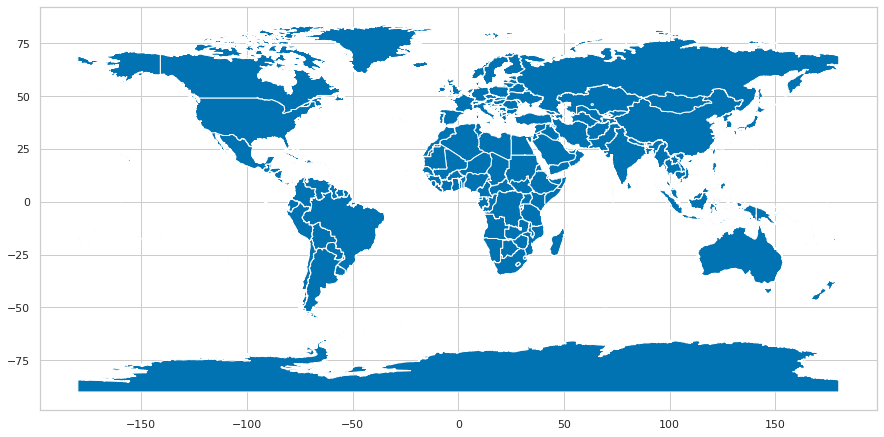

In [79]:
fig, ax = plt.subplots(figsize = (15, 15))
world_map.plot(ax = ax)

In [80]:
# Define a coordinate reference system (CRS)
crs = {'init': 'espg:4326'}

## Plot Counts by Hierarchy 00 (Country)

In [96]:
def count_style_country(wine_style, color):    
    df = df_Count_WS_All_00[(df_Count_WS_All_00.Wine_Style == wine_style)]

    geo_count = [Point(xy) for xy in zip( df['Longitude'], df['Latitude'])]

    geo_df = gpd.GeoDataFrame(
        df, 
        crs = crs, 
        geometry = geo_count
    )

    fig, ax = plt.subplots(figsize = (15, 15))
    
    world_map.plot(ax = ax, alpha = 0.4, color = 'gray')

    geo_df.plot(ax=ax, markersize = geo_df['Count'], color = color, marker = 'o', label = 'Count of Scores')
    plt.legend(prop={'size': 15})
    plt.title(wine_style + '\nCount of Wine Spectator Scores by Denominación de Origen\nReview Years 1988-2020')

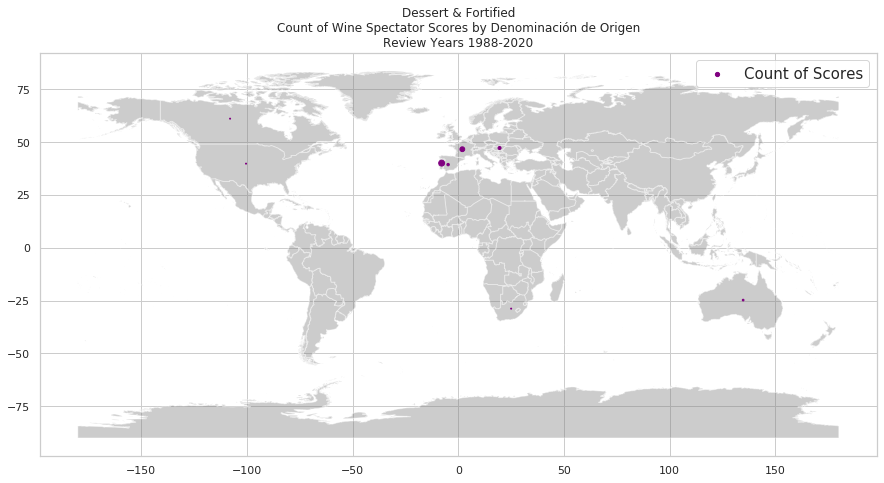

In [97]:
count_style_country('Dessert & Fortified', 'purple')

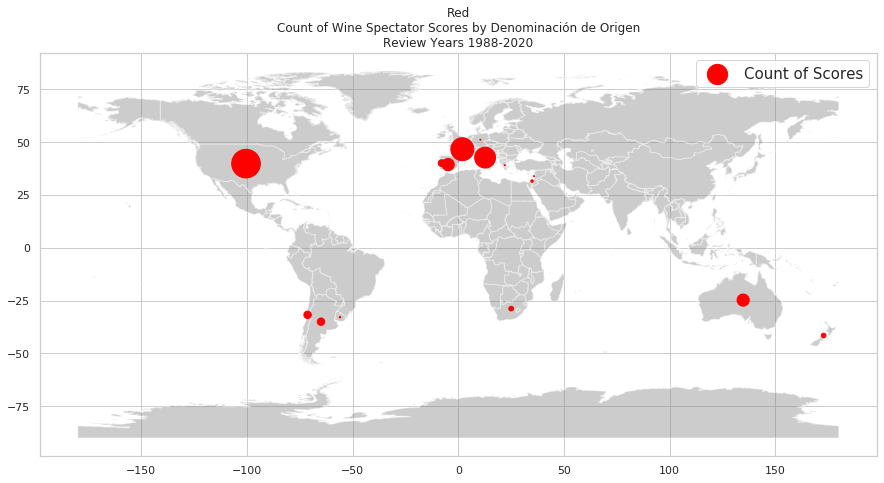

In [98]:
count_style_country('Red', 'red')

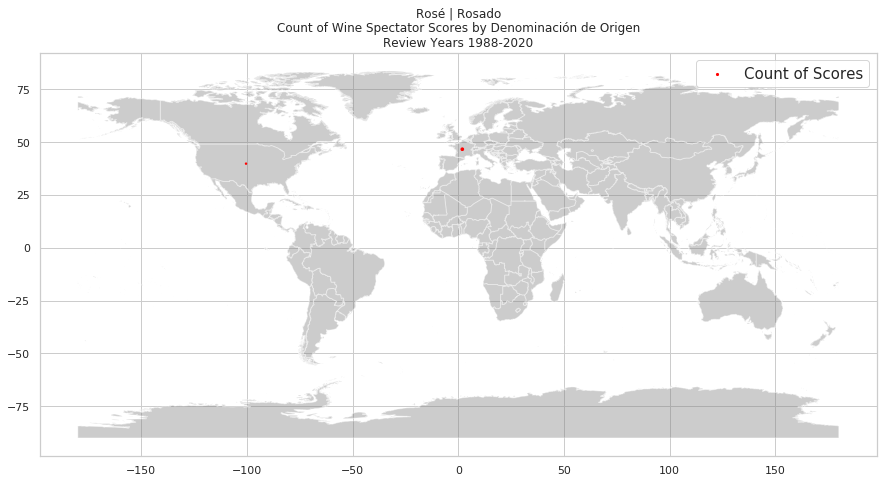

In [104]:
count_style_country('Rosé | Rosado', 'red')

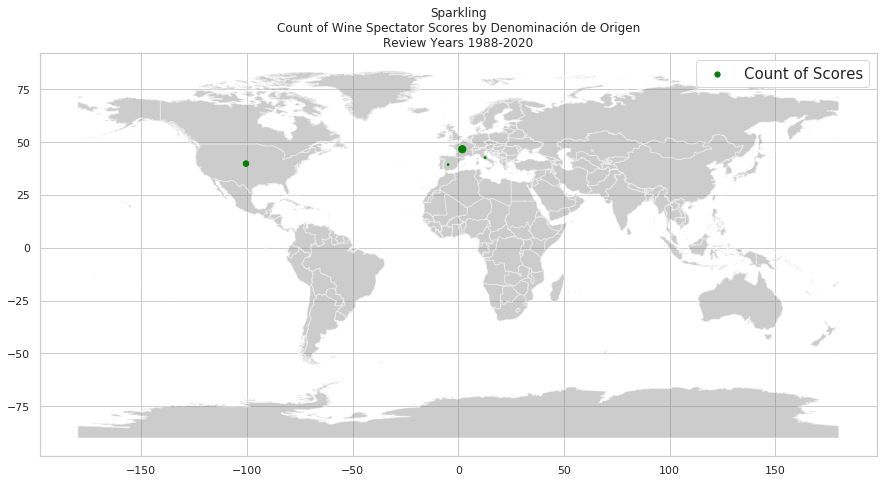

In [100]:
count_style_country('Sparkling', 'green')

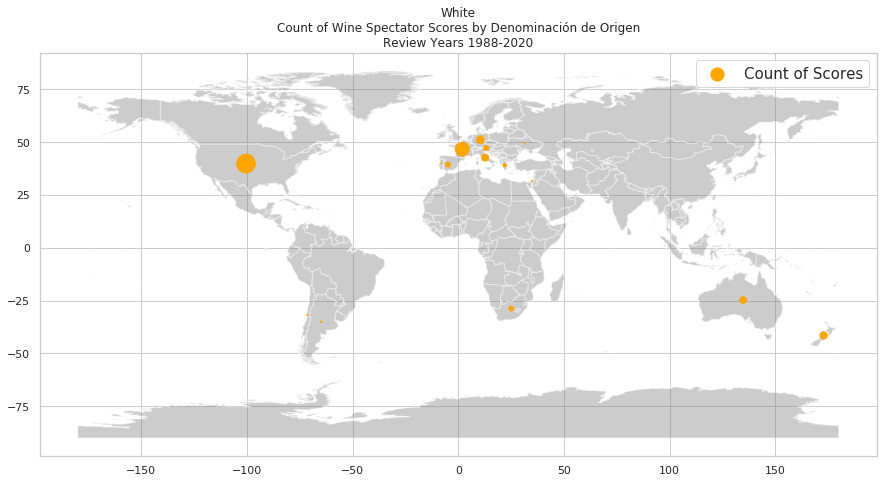

In [103]:
count_style_country('White', 'orange')

## Plot Counts by Hierarchy 01 (within Country)

In [134]:
# import country maps
usa_map = gpd.read_file('./shapefiles/USA/vw421bb8115.shp')
france_map = gpd.read_file('./shapefiles/France/ym781wr7170.shp')
italy_map = gpd.read_file('./shapefiles/Italy/bb489fv3314.shp')

In [139]:
def count_style_subcountry(wine_style, country, color):    
    df = df_Count_All_01[
        (df_Count_All_01.Wine_Style == wine_style) &
        (df_Count_All_01.Address.str.contains(country) == True)
    ]
    
    if country == 'USA':
        country_map = usa_map
    elif country == 'France':
        country_map = france_map
    elif country == 'Italy':
        country_map = italy_map
    else:
        print('select USA, France, or Italy as country')

    geo_count = [Point(xy) for xy in zip( df['Longitude'], df['Latitude'])]

    geo_df = gpd.GeoDataFrame(
        df, 
        crs = crs, 
        geometry = geo_count
    )

    fig, ax = plt.subplots(figsize = (10, 10))
    
    if country == 'USA':
        ax.set(xlim = (-130, -60), ylim = (20, 55))
    
    country_map.plot(ax = ax, alpha = 0.4, color = 'gray')

    geo_df.plot(ax=ax, markersize = geo_df['Count'] * 3, color = color, marker = 'o', label = 'Count of Scores')
    plt.legend(prop={'size': 15})
    plt.title(wine_style + '\nCount of Wine Spectator Scores by Denominación de Origen\nReview Years 1988-2020')

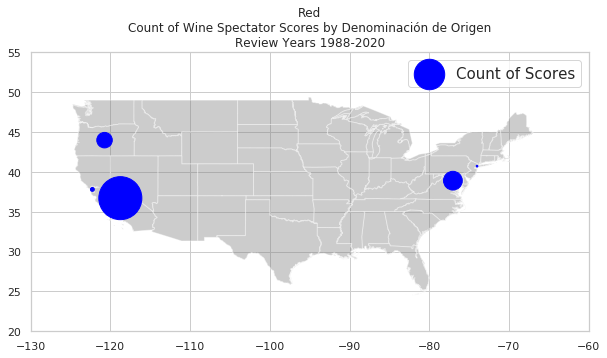

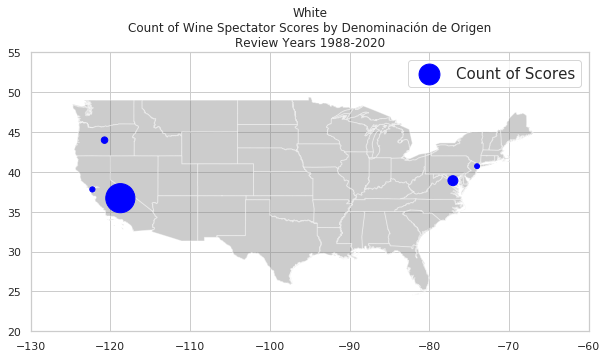

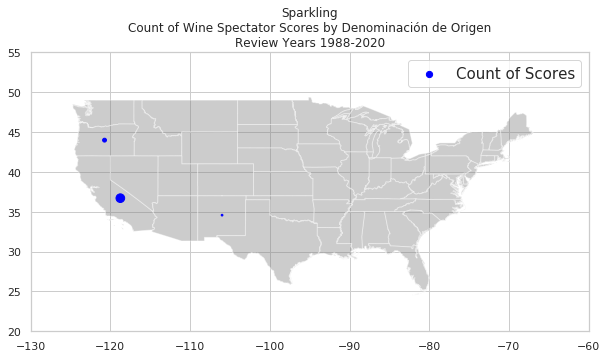

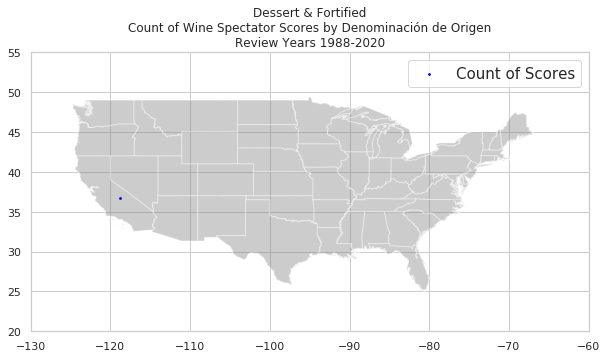

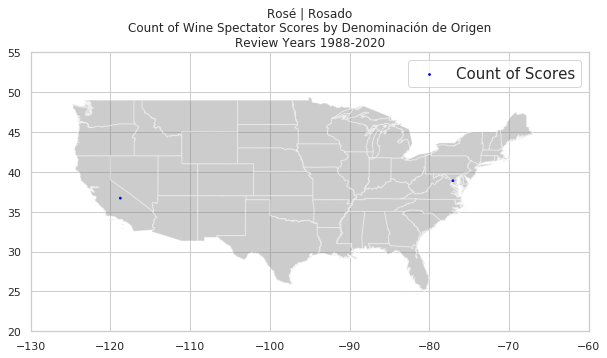

In [140]:
styles = df_Wine_01.Wine_Style.unique()

for style in styles:
    count_style_subcountry(style, 'USA', 'blue')

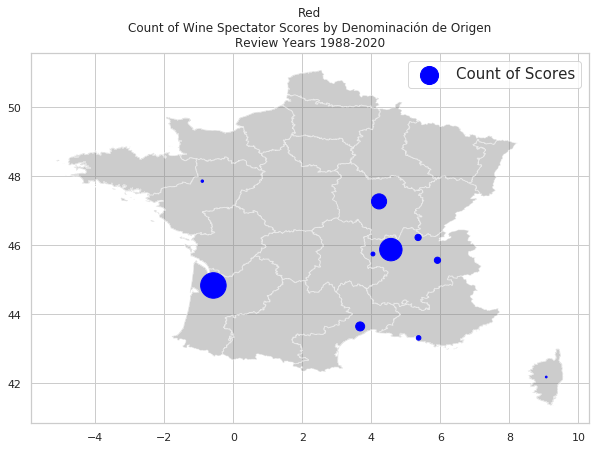

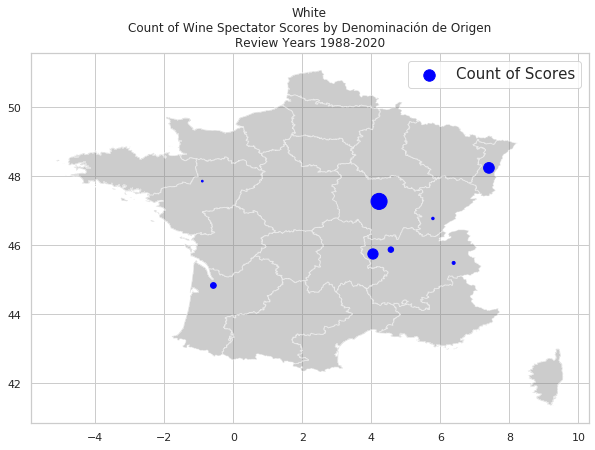

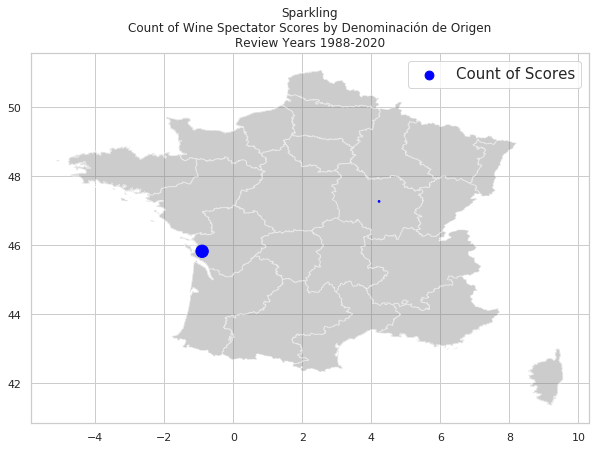

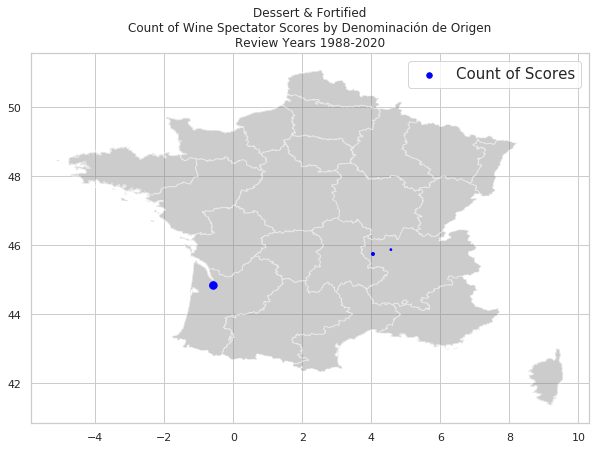

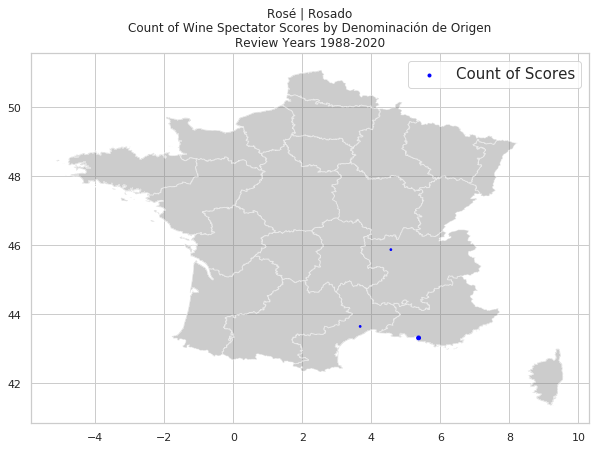

In [137]:
styles = df_Wine_01.Wine_Style.unique()

for style in styles:
    count_style_subcountry(style, 'France', 'blue')

/home/elizabethwotawa/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
No handles with labels found to put in legend.
/home/elizabethwotawa/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
No handles with labels found to put in legend.


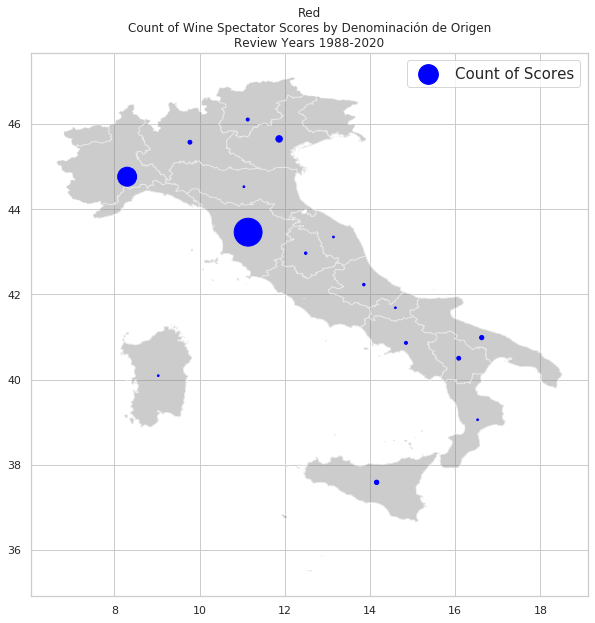

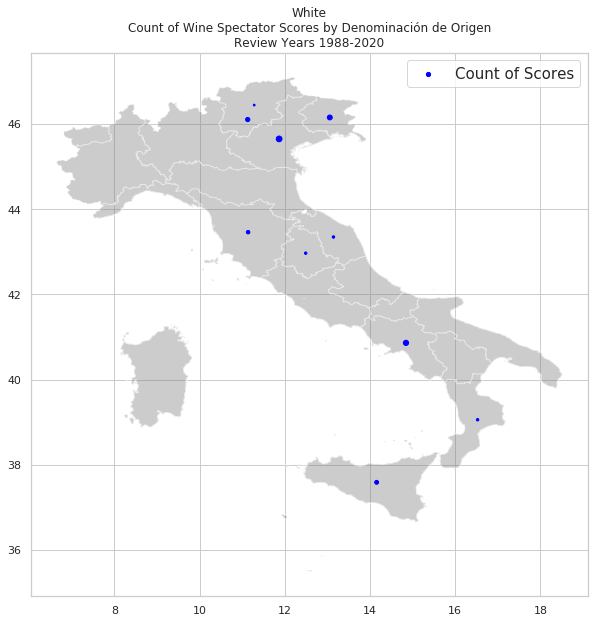

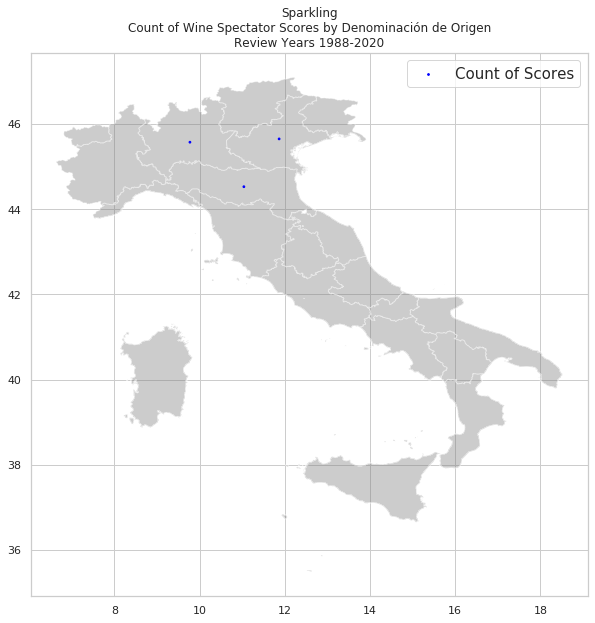

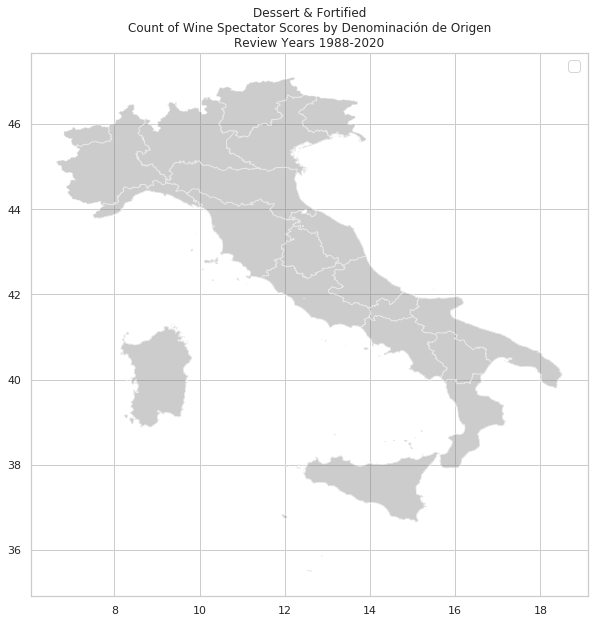

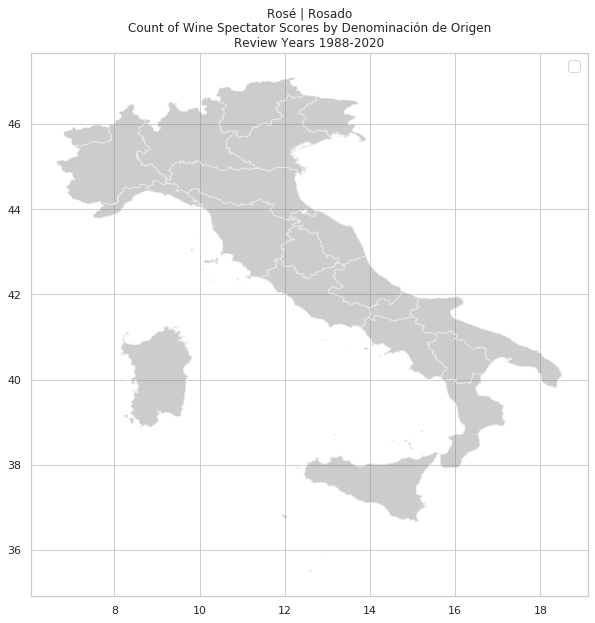

In [138]:
styles = df_Wine_01.Wine_Style.unique()

for style in styles:
    count_style_subcountry(style, 'Italy', 'blue')